<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,44.262947,57.128655,-59.954713,106.957124,139.090112,-32.132988
1,0.0,1.0,49.633248,51.933437,48.405848,126.769910,286.742444,211.468453,75.273991
2,0.0,2.0,79.051543,82.535765,63.683617,230.040645,465.311570,31.300131,434.011439
3,0.0,3.0,32.810280,47.048985,82.973968,-250.746987,-77.913753,-51.421189,-26.492565
4,0.0,4.0,85.777397,65.408576,90.889770,-265.405185,-13.329442,-187.061500,173.732057
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,143.600565,328.644059,323.177902,5.466157
19996,999.0,16.0,92.663682,58.512599,35.091714,45.101099,241.369094,257.540613,-16.171519
19997,999.0,17.0,63.062248,86.565478,27.853802,856.589593,1044.071121,326.412806,717.658315
19998,999.0,18.0,47.655607,57.944117,86.192826,13.517680,215.310230,241.245359,-25.935129


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,44.262947,57.128655,-59.954713,106.957124,139.090112,-32.132988
1,0.0,1.0,49.633248,51.933437,48.405848,126.769910,286.742444,211.468453,75.273991
2,0.0,2.0,79.051543,82.535765,63.683617,230.040645,465.311570,31.300131,434.011439
3,0.0,3.0,32.810280,47.048985,82.973968,-250.746987,-77.913753,-51.421189,-26.492565
4,0.0,4.0,85.777397,65.408576,90.889770,-265.405185,-13.329442,-187.061500,173.732057
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,143.600565,328.644059,323.177902,5.466157
19996,999.0,16.0,92.663682,58.512599,35.091714,45.101099,241.369094,257.540613,-16.171519
19997,999.0,17.0,63.062248,86.565478,27.853802,856.589593,1044.071121,326.412806,717.658315
19998,999.0,18.0,47.655607,57.944117,86.192826,13.517680,215.310230,241.245359,-25.935129


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    55.520235  44.262947  ...  139.090112  -32.132988
      1.0    49.633248  51.933437  ...  211.468453   75.273991
      2.0    79.051543  82.535765  ...   31.300131  434.011439
      3.0    32.810280  47.048985  ...  -51.421189  -26.492565
      4.0    85.777397  65.408576  ... -187.061500  173.732057
...                ...        ...  ...         ...         ...
999.0 15.0   23.294746  92.518305  ...  323.177902    5.466157
      16.0   92.663682  58.512599  ...  257.540613  -16.171519
      17.0   63.062248  86.565478  ...  326.412806  717.658315
      18.0   47.655607  57.944117  ...  241.245359  -25.935129
      19.0   99.921349  36.147862  ...  185.231044  291.396705

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    55.520235  44.262947  ...  139.090112  -32.132988
      1.0    49.633248  51.933437  ...  211.468453   75.273991
      2.0    79.051543  82.535765  ...   31.300131  434.011439
      3.0    32.810280  47.048985  ...  -51.421189  -26.492565
      4.0    85.777397  65.408576  ... -187.061500  173.732057
...                ...        ...  ...         ...         ...
999.0 15.0   23.294746  92.518305  ...  323.177902    5.466157
      16.0   92.663682  58.512599  ...  257.540613  -16.171519
      17.0   63.062248  86.565478  ...  326.412806  717.658315
      18.0   47.655607  57.944117  ...  241.245359  -25.935129
      19.0   99.921349  36.147862  ...  185.231044  291.396705

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,44.262947,57.128655,-59.954713,106.957124,139.090112,-32.132988
1,0.0,1.0,49.633248,51.933437,48.405848,126.769910,286.742444,211.468453,75.273991
2,0.0,2.0,79.051543,82.535765,63.683617,230.040645,465.311570,31.300131,434.011439
3,0.0,3.0,32.810280,47.048985,82.973968,-250.746987,-77.913753,-51.421189,-26.492565
4,0.0,4.0,85.777397,65.408576,90.889770,-265.405185,-13.329442,-187.061500,173.732057
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,143.600565,328.644059,323.177902,5.466157
19996,999.0,16.0,92.663682,58.512599,35.091714,45.101099,241.369094,257.540613,-16.171519
19997,999.0,17.0,63.062248,86.565478,27.853802,856.589593,1044.071121,326.412806,717.658315
19998,999.0,18.0,47.655607,57.944117,86.192826,13.517680,215.310230,241.245359,-25.935129


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    55.520235  44.262947  ...  139.090112  -32.132988
      1.0    49.633248  51.933437  ...  211.468453   75.273991
      2.0    79.051543  82.535765  ...   31.300131  434.011439
      3.0    32.810280  47.048985  ...  -51.421189  -26.492565
      4.0    85.777397  65.408576  ... -187.061500  173.732057
...                ...        ...  ...         ...         ...
999.0 15.0   23.294746  92.518305  ...  323.177902    5.466157
      16.0   92.663682  58.512599  ...  257.540613  -16.171519
      17.0   63.062248  86.565478  ...  326.412806  717.658315
      18.0   47.655607  57.944117  ...  241.245359  -25.935129
      19.0   99.921349  36.147862  ...  185.231044  291.396705

[20000 rows x 7 columns]

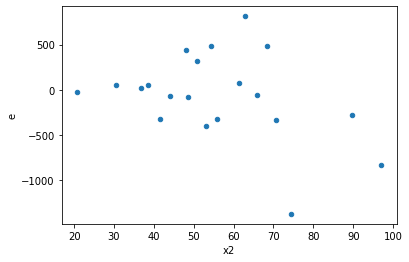

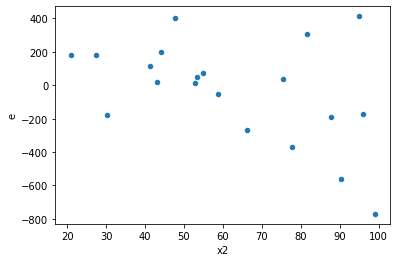

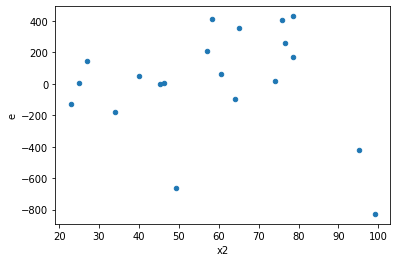

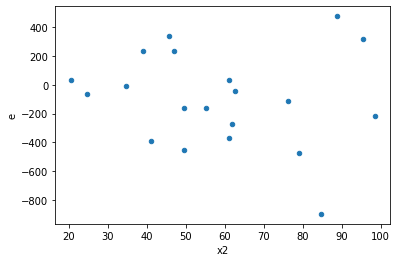

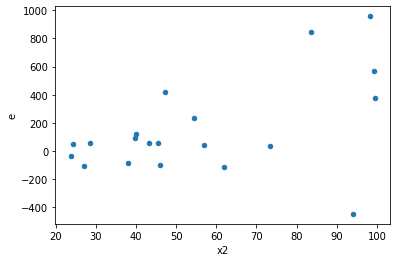

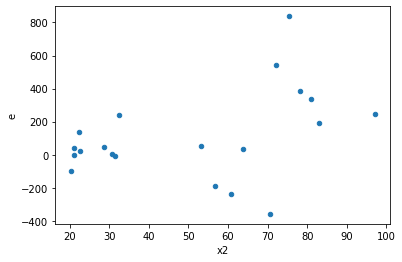

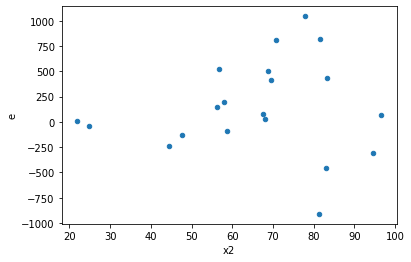

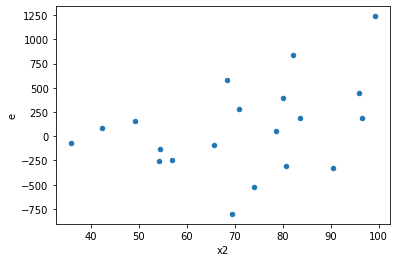

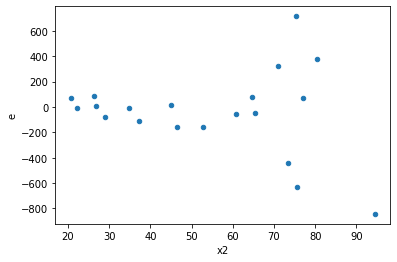

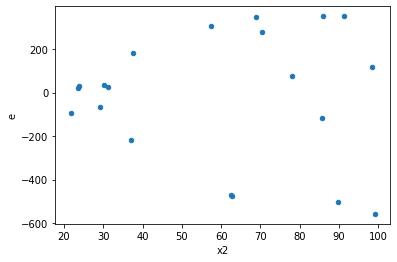

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,68465.08494612877,1596807.4833856195,13693.016989225755,319361.4966771239,23.322946062829764,0.0035611016890928493,0.9982194491554536,0.0017805508445464246,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,34732.26547109603,787154.5674598352,6946.453094219205,157430.91349196705,22.663496227014054,0.003809595085253248,0.9980952024573734,0.001904797542626624,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,45197.94259622538,1952003.657019957,9039.588519245077,390400.7314039914,43.18788743235792,0.0008168799044645514,0.9995915600477677,0.0004084399522322757,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,45944.14570050063,114895.0591433183,9188.829140100126,22979.01182866366,2.5007551537097434,0.3372139854287828,0.8313930072856086,0.1686069927143914,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,68655.76877956168,1420540.920649308,13731.153755912335,284108.1841298616,20.69077290810547,0.004715683249243874,0.9976421583753781,0.002357841624621937,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,44467.13525760879,64186.558871480695,8893.427051521758,12837.311774296139,1.4434606254626603,0.6969441568248826,0.6515279215875587,0.3484720784124413,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,187318.43526642292,466362.52070723753,37463.687053284586,93272.50414144751,2.489677644615867,0.3394875371143167,0.8302562314428417,0.16974376855715834,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,106841.53836849754,783350.844785476,21368.307673699506,156670.1689570952,7.331894099874256,0.04741422695753528,0.9762928865212324,0.02370711347876764,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,73485.74486321611,435029.37790005043,14697.148972643223,87005.87558001009,5.919915198652466,0.07328169227594628,0.9633591538620269,0.03664084613797314,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,68465.08494612877,1596807.4833856195,13693.016989225755,319361.4966771239,23.322946062829764,0.0035611016890928493,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,34732.26547109603,787154.5674598352,6946.453094219205,157430.91349196705,22.663496227014054,0.003809595085253248,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,45197.94259622538,1952003.657019957,9039.588519245077,390400.7314039914,43.18788743235792,0.0008168799044645514,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,45944.14570050063,114895.0591433183,9188.829140100126,22979.01182866366,2.5007551537097434,0.3372139854287828,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,68655.76877956168,1420540.920649308,13731.153755912335,284108.1841298616,20.69077290810547,0.004715683249243874,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,44467.13525760879,64186.558871480695,8893.427051521758,12837.311774296139,1.4434606254626603,0.6969441568248826,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,187318.43526642292,466362.52070723753,37463.687053284586,93272.50414144751,2.489677644615867,0.3394875371143167,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,106841.53836849754,783350.844785476,21368.307673699506,156670.1689570952,7.331894099874256,0.04741422695753528,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,73485.74486321611,435029.37790005043,14697.148972643223,87005.87558001009,5.919915198652466,0.07328169227594628,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    581
Reject005=1 : Homoscedasticity      419
Name: Result_test, dtype: int64